In [1]:
import pandas as pd
from sklearn import metrics

!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%202b%20-%20Logistic%20Regression/cancer.csv"

data = pd.read_csv('cancer.csv')
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
data.to_csv('cancer.csv')
del data

cancer.csv          100%[===================>] 122.27K  --.-KB/s    in 0.03s   


/var/folders/7t/2rck1m6n5vl4r8x64c8z1l740000gn/T/ipykernel_91008/549517556.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
/var/folders/7t/2rck1m6n5vl4r8x64c8z1l740000gn/T/ipykernel_91008/549517556.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting

In [2]:
# First, import helpful Python tools for loading/navigating data
import os             # Good for navigating your computer's files
import numpy as np    # Great for lists (arrays) of numbers
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv)
from sklearn.metrics import accuracy_score   # Great for creating quick ML models

In [3]:
# This is the name of our data file, which was downloaded in the set up cell.
# Check out the file explorer (folder on the left toolbar) to see where that lives!
data_path = 'cancer.csv'

# Use the 'pd.read_csv(filepath)' function to read in read our data and store it
# in a variable called 'dataframe'
dataframe = pd.read_csv(data_path)

# Redefine `dataframe` to include only the columns discussed
dataframe = dataframe[['diagnosis', 'perimeter_mean', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean']]

# Define a new, more descriptive `diagnosis_cat` column
dataframe['diagnosis_cat'] = dataframe['diagnosis'].astype('category').map({1: '1 (malignant)', 0: '0 (benign)'})

In [4]:
dataframe.head()

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant)
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant)
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant)
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant)
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant)


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant)
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant)
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant)
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant)
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant)


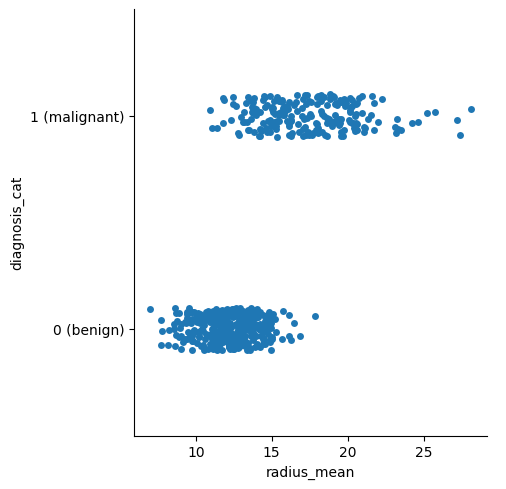

In [5]:
sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
dataframe.head()

In [6]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

In [7]:
logreg_model = linear_model.LogisticRegression()

In [8]:
X = ['perimeter_mean','radius_mean','texture_mean','area_mean','smoothness_mean','concavity_mean','symmetry_mean']
y = 'diagnosis_cat'

X_train = train_df[X]
print('X_train, our input variables:')
print(X_train.head())
print()

y_train = train_df[y]
print('y_train, our output variable:')
print(y_train.head())

X_train, our input variables:
     perimeter_mean  radius_mean  texture_mean  area_mean  smoothness_mean  \
408          117.80        17.99         20.66      991.7          0.10360   
4            135.10        20.29         14.34     1297.0          0.10030   
307           56.36         9.00         14.40      246.3          0.07005   
386           78.78        12.21         14.09      462.0          0.08108   
404           78.29        12.34         14.95      469.1          0.08682   

     concavity_mean  symmetry_mean  
408        0.120100         0.1992  
4          0.198000         0.1809  
307        0.003681         0.1788  
386        0.068390         0.1646  
404        0.021090         0.1571  

y_train, our output variable:
408    1 (malignant)
4      1 (malignant)
307       0 (benign)
386       0 (benign)
404       0 (benign)
Name: diagnosis_cat, dtype: category
Categories (2, object): ['0 (benign)', '1 (malignant)']


In [9]:
logreg_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
X_test = test_df[X]
y_test = test_df[y]

In [11]:
y_pred = logreg_model.predict(X_test)
test_df['predicted'] = y_pred

In [12]:
print(X_test)
print(y_pred)

     perimeter_mean  radius_mean  texture_mean  area_mean  smoothness_mean  \
421           98.22       14.690         13.98      656.1          0.10310   
47            85.98       13.170         18.66      534.6          0.11580   
292           83.14       12.950         16.02      513.7          0.10050   
186          118.60       18.310         18.58     1041.0          0.08588   
414           96.71       15.130         29.81      719.5          0.08320   
..              ...          ...           ...        ...              ...   
172          102.50       15.460         11.89      736.9          0.12570   
3             77.58       11.420         20.38      386.1          0.14250   
68            58.79        9.029         17.33      250.5          0.10660   
448           94.25       14.530         19.34      659.7          0.08388   
442           88.37       13.780         15.79      585.9          0.08817   

     concavity_mean  symmetry_mean  
421         0.14500       

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8771929824561403
